In [2]:
import rosbag
import rospy
import yaml
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def bag_to_data(bagpath):
    jbagpath = bagpath # define path to bag file
    jbag = rosbag.Bag(jbagpath, 'r') # read bag file
    j_info_dict = yaml.load(jbag._get_yaml_info()) # load the yaml info file from the bag
    # for x in j1_info_dict['topics']:
    #     print(x)

    # topics of interest
    feedback = '/bbot/PositionJointInterface_trajectory_controller/follow_joint_trajectory/feedback'
    goal = '/bbot/PositionJointInterface_trajectory_controller/follow_joint_trajectory/goal'
    status = '/bbot/PositionJointInterface_trajectory_controller/follow_joint_trajectory/status'
    state = '/bbot/PositionJointInterface_trajectory_controller/state'
    state2 = '/bbot/joint_states'
    clock = '/clock'
    linkstates = '/gazebo/link_states'
    pid1 = '/bbot/gazebo_ros_control/pid_gains/bbot_joint_1/parameter_updates'
    pid2 = '/bbot/gazebo_ros_control/pid_gains/bbot_joint_2/parameter_updates'
    pid3 = '/bbot/gazebo_ros_control/pid_gains/bbot_joint_3/parameter_updates'
    pid4 = '/bbot/gazebo_ros_control/pid_gains/bbot_joint_4/parameter_updates'
    pid5 = '/bbot/gazebo_ros_control/pid_gains/bbot_joint_5/parameter_updates'
    pid6 = '/bbot/gazebo_ros_control/pid_gains/bbot_joint_6/parameter_updates'
    pid7 = '/bbot/gazebo_ros_control/pid_gains/bbot_joint_7/parameter_updates'
    paramupdates = '/gazebo/parameter_updates'
    paramdescription = '/gazebo/parameter_descriptions'

    # initialize vectors for plotting
    j_time = []
    j_desired = []
    j_actual = []
    j_error = []
    j_pid = np.zeros((7,3))

    # add data to vectors
    for topic, msg, type in jbag.read_messages():
        if topic == feedback:
            j_time.append(float(msg.feedback.header.stamp.secs) + float(msg.feedback.header.stamp.nsecs)/10.0**9)
            j_desired.append(msg.feedback.desired.positions)
            j_actual.append(msg.feedback.actual.positions)
            j_error.append(msg.feedback.error.positions)
#             print(msg)
        if topic == pid1:
            j_pid[0,0] = msg.doubles[0].value
            j_pid[0,1] = msg.doubles[1].value
            j_pid[0,2] = msg.doubles[2].value
        if topic == pid2:
            j_pid[1,0] = msg.doubles[0].value
            j_pid[1,1] = msg.doubles[1].value
            j_pid[1,2] = msg.doubles[2].value
        if topic == pid3:
            j_pid[2,0] = msg.doubles[0].value
            j_pid[2,1] = msg.doubles[1].value
            j_pid[2,2] = msg.doubles[2].value
        if topic == pid4:
            j_pid[3,0] = msg.doubles[0].value
            j_pid[3,1] = msg.doubles[1].value
            j_pid[3,2] = msg.doubles[2].value
        if topic == pid5:
            j_pid[4,0] = msg.doubles[0].value
            j_pid[4,1] = msg.doubles[1].value
            j_pid[4,2] = msg.doubles[2].value
        if topic == pid6:
            j_pid[5,0] = msg.doubles[0].value
            j_pid[5,1] = msg.doubles[1].value
            j_pid[5,2] = msg.doubles[2].value
        if topic == pid7:
            j_pid[6,0] = msg.doubles[0].value
            j_pid[6,1] = msg.doubles[1].value
            j_pid[6,2] = msg.doubles[2].value
    return j_time, j_desired, j_actual, j_error, j_pid;



In [32]:
# print(j_time)
# print(j_actual[0].positions)
print(j_time[0])
print(j_actual[0])
print(j_actual)

43.74
(-0.07247610480430389, -0.32854005116499607, -1.210088435337231, -0.1463234496709278, -0.039569913885851626, -0.010609148225311671)
[(-0.07247610480430389, -0.32854005116499607, -1.210088435337231, -0.1463234496709278, -0.039569913885851626, -0.010609148225311671), (-0.07153702631798087, -0.32251869764961505, -1.2164023623805216, -0.1447316317402274, -0.03848747240840211, -0.010415573498359976), (-0.07055804402774513, -0.31789448594075065, -1.2214667980101828, -0.14202305989289066, -0.037469145597259335, -0.010243240613598381), (-0.06911687003525646, -0.3112280645588399, -1.228967667309628, -0.13773879083905705, -0.036264294662354146, -0.010036901910407181), (-0.06730189648746876, -0.3030652912640681, -1.238488533842168, -0.1334624832947604, -0.03536957733238033, -0.009797728110378934), (-0.06693892984178085, -0.3014989791261664, -1.2403638557556098, -0.1328542266602133, -0.0352714470849973, -0.009749484274509612), (-0.06543083784338943, -0.2951467140414943, -1.2480859928084085, 

# Joint 1

## Sim

In [10]:
j1bagpath = 'joint1_sim.bag'
j1_time, j1_desired, j1_actual, j1_error, j1_pid = bag_to_data(j1bagpath)

/home/dynamic/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


([43.74, 43.77, 43.8, 43.84, 43.89, 43.9, 43.94, 43.96, 44.0, 44.04, 44.07, 44.1, 44.16, 44.17, 44.2, 44.24, 44.27, 44.3, 44.33, 44.36, 44.4, 44.44, 44.46, 44.51, 44.54, 44.57, 44.6, 44.64, 44.68, 44.7, 44.75, 44.76, 44.8, 44.85, 44.87, 44.89, 44.94, 44.98, 45.01, 45.03, 45.07, 45.1, 45.15, 45.19, 45.2, 45.24, 45.28, 45.31, 45.34, 45.37, 45.4, 45.44, 45.47, 45.5, 45.56, 45.57, 45.6, 45.64, 45.67, 45.7, 45.74, 45.77, 45.8, 45.83, 45.86, 45.89, 45.94, 45.97, 46.0, 46.06, 46.07, 46.1, 46.14, 46.17, 46.2, 46.24, 46.28, 46.3, 46.33, 46.37, 46.4, 46.44, 46.47, 46.51, 46.55, 46.57, 46.59, 46.63, 46.66, 46.7, 46.73, 46.77, 46.8, 46.84, 46.87, 46.9, 46.94, 47.0, 47.0, 47.04, 47.09, 47.12, 47.14, 47.17, 47.2, 47.23, 47.28, 47.3, 47.33, 47.39, 47.39, 47.43, 47.47, 47.52, 47.54, 47.57, 47.6, 47.64, 47.7, 47.71, 47.74, 47.77, 47.8, 47.84, 47.87, 47.89, 47.93, 47.97, 48.0, 48.04, 48.07, 48.09, 48.14, 48.16, 48.19, 48.25, 48.27, 48.29, 48.33, 48.37, 48.4, 48.45, 48.47, 48.51, 48.54, 48.57, 48.6, 48.6

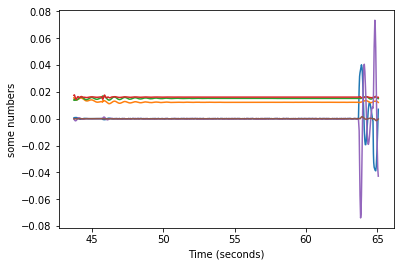

In [11]:
plt.plot(j1_time, j1_error)
plt.ylabel('some numbers')
plt.xlabel('Time (seconds)')
plt.show()

## Real

# Joint 2